# Clustering Segmentation Customer

**Objetivo:** Demostrar el concepto de segmentación de un conjunto de datos de clientes de un sitio de comercio electrónico utilizando k-means clustering en python. El conjunto de datos contiene los **ingresos anuales de ~300 clientes** y su **gasto anual** en un sitio de comercio electrónico. Usaremos el algoritmo de agrupamiento k-means para derivar el número óptimo de agrupaciones y comprender los segmentos de clientes subyacentes en función de los datos proporcionados.

### Importar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importar estilo del Plot

In [2]:
import seaborn as sns; sns.set() #para el estilo del plot
%matplotlib inline

plt.rcParams['figure.figsize'] = (16,9)


### Leer .csv

In [3]:
dataset = pd.read_csv('dataset.csv')

### Explorar dataset

In [4]:
dataset.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [5]:
len(dataset)

303

### Estadística descriptiva del dataset

In [6]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


### Visualización de los ingresos y los gastos

Text(0.5, 6.799999999999979, 'INCOME/SPEND')

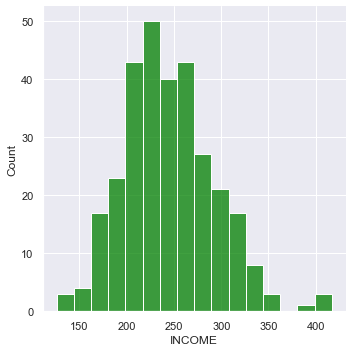

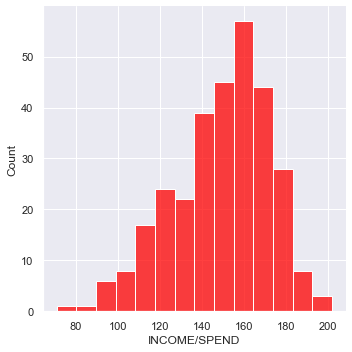

In [7]:
plot_ingresos = sns.displot(dataset["INCOME"], color='green')
plot_gastos = sns.displot(dataset["SPEND"], color='red')
plt.xlabel('INCOME/SPEND')

In [8]:
### Gráfica de violín Ingresos vs Gastos 

[(0.0, 420.0)]

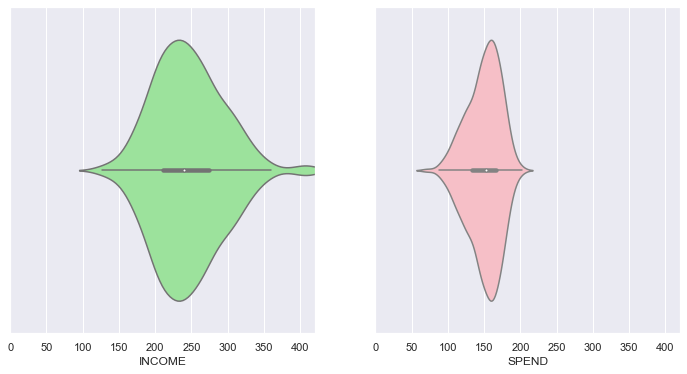

In [9]:
f, axes = plt.subplots(1,2, figsize =(12,6), sharex = True, sharey = True)
v1 = sns.violinplot(data = dataset , x = 'INCOME', color = "lightgreen", ax = axes[0])

v2 = sns.violinplot(data = dataset , x = 'SPEND', color = "lightpink", ax = axes[1])

v1.set(xlim=(0,420))

In [10]:
X = dataset.values.copy()

### Método del codo para hallar el número óptimo de clusters

Donde el codo comienza a doblarse pronunciada mente, indica el número óptimo de clusters *4*

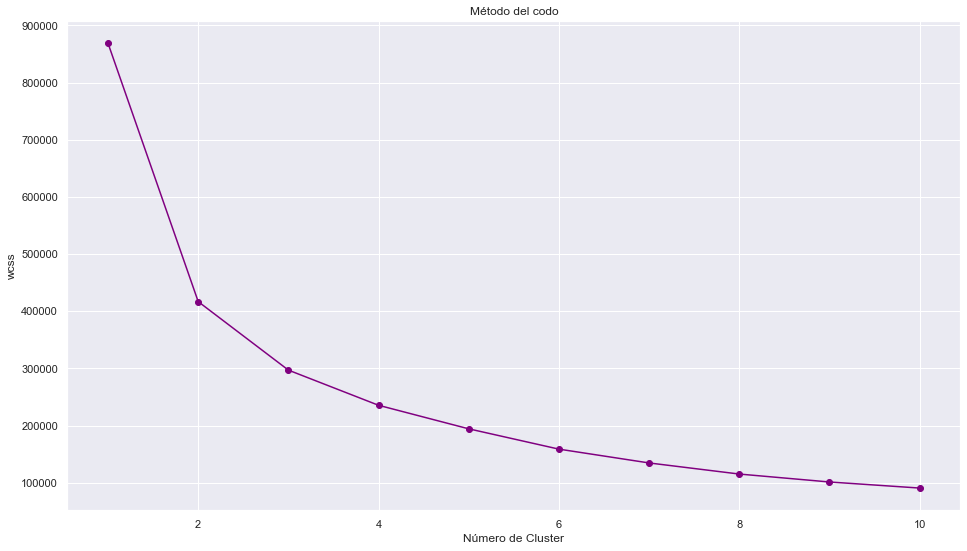

In [11]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state= 0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11,),wcss,  color='purple', marker="o")
plt.title('Método del codo')
plt.xlabel('Número de Cluster')
plt.ylabel('wcss')
plt.show()

### Ajuste de KMeans al conjunto de datos con K=4

In [12]:
km4 = KMeans(n_clusters = 4, init = "k-means++", max_iter =300, n_init = 10, random_state = 0)
y_means = km4.fit_predict(X)

### Visualizando los grupos para k=4

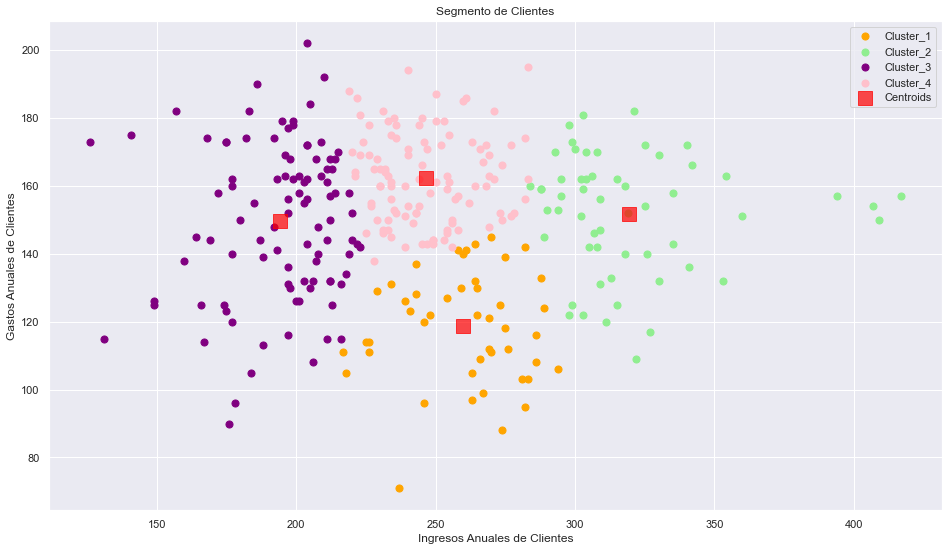

In [27]:
plt.scatter(X[y_means==0,0], X[y_means==0,1], s=50, c='orange', label = 'Cluster_1')
plt.scatter(X[y_means==1,0], X[y_means==1,1], s=50 , c='lightgreen', label ='Cluster_2')
plt.scatter(X[y_means==2,0], X[y_means==2,1], s=50, c='purple', label = 'Cluster_3')
plt.scatter(X[y_means==3,0], X[y_means==3,1], s=50, c='pink', label = 'Cluster_4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1], s=200, marker='s', c='red', alpha=0.7, label ='Centroids')
plt.title('Segmento de Clientes')
plt.xlabel('Ingresos Anuales de Clientes')
plt.ylabel('Gastos Anuales de Clientes')
plt.legend()
plt.show()



### Ajuste de KMeans al conjunto de datos con K=6

In [28]:
km6 = KMeans(n_clusters = 6, init = "k-means++", max_iter =300, n_init = 10, random_state = 0)
y_means = km6.fit_predict(X)

### Visualizando los grupos para k=6

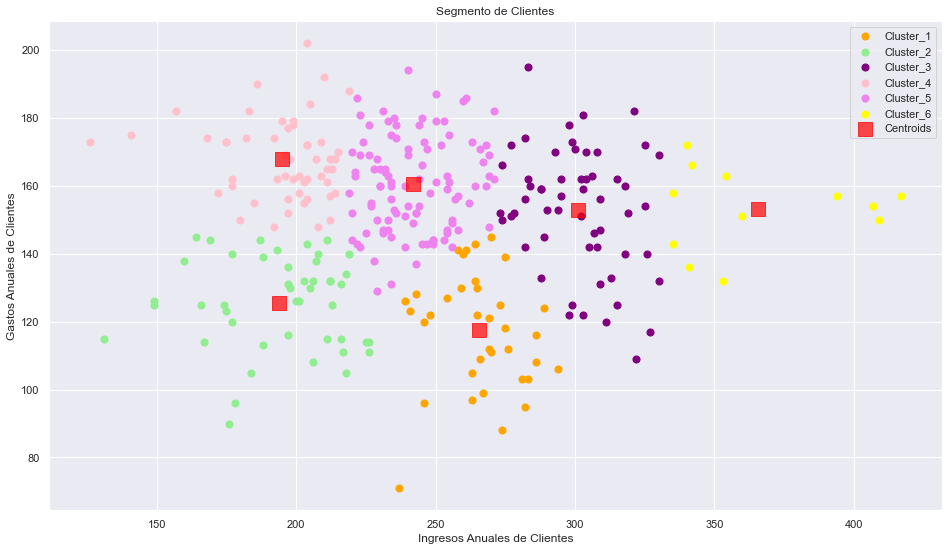

In [30]:
plt.scatter(X[y_means==0,0], X[y_means==0,1], s=50, c='orange', label = 'Cluster_1')
plt.scatter(X[y_means==1,0], X[y_means==1,1], s=50 , c='lightgreen', label ='Cluster_2')
plt.scatter(X[y_means==2,0], X[y_means==2,1], s=50, c='purple', label = 'Cluster_3')
plt.scatter(X[y_means==3,0], X[y_means==3,1], s=50, c='pink', label = 'Cluster_4')
plt.scatter(X[y_means==4,0], X[y_means==4,1], s=50, c='violet', label = 'Cluster_5')
plt.scatter(X[y_means==5,0], X[y_means==5,1], s=50, c='yellow', label = 'Cluster_6')

plt.scatter(km6.cluster_centers_[:,0], km6.cluster_centers_[:,1], s=200, marker='s', c='red', alpha=0.7, label ='Centroids')
plt.title('Segmento de Clientes')
plt.xlabel('Ingresos Anuales de Clientes')
plt.ylabel('Gastos Anuales de Clientes')
plt.legend()
plt.show()




### Conclusiones

Con base en los 6 clústeres, podríamos formular estrategias de marketing relevantes para cada clúster:

* Una estrategia típica enfocaría ciertos esfuerzos promocionales para los clientes de alto valor de Cluster 6 y Cluster 3.

* El grupo 4 es un segmento de clientes único, donde a pesar de sus ingresos anuales relativamente más bajos, estos clientes tienden a gastar más en el sitio, lo que indica su lealtad. Podría haber algunas campañas promocionales basadas en precios con descuento para este grupo a fin de retenerlos.

* Para el Grupo 2, donde tanto los ingresos como el gasto anual son bajos, podría ser necesario un análisis más profundo para encontrar las razones del gasto más bajo y podrían introducirse estrategias sensibles al precio para aumentar el gasto de este segmento.

* Los clientes de los grupos 1 y 5 no gastan lo suficiente en el sitio a pesar de tener un buen ingreso anual; un análisis más profundo de estos segmentos podría generar información sobre la satisfacción/insatisfacción de estos clientes o una menor visibilidad del sitio de comercio electrónico para estos clientes. . Las estrategias podrían desarrollarse en consecuencia.